In [87]:
import csv

csv_file = 'tmp~0.csv'  # Путь к исходному CSV файлу
txt_file = 'output.txt'  # Путь к выходному TXT файлу
with open(csv_file, mode='r', encoding='utf-8') as csv_input, \
     open(txt_file, mode='w', encoding='utf-8') as txt_output:
    it = iter(csv_input.readlines())
    next(it)
    for row in it:
        s = row[:-1]
        s = s.split(',')
        txt_output.write(s[2] + '\n')

In [88]:
import json, re
with open("anchor.json", "r", encoding="utf-8") as file:
    anchors = json.load(file)
groups = dict((i,0) for i in anchors.keys())
groups["other"] = 0
with open(csv_file, mode="r", encoding='utf-8') as csv_input, \
    open("tmp~1.csv", mode="w", encoding='utf-8') as csv_output:
    it = iter(csv_input.readlines())
    next(it)
    for row in it:
        title=row[:-1].split(',')[2]
        for i in groups:
            if i == "other":
                groups[i] += 1
                csv_output.write(row[:-1]+','+i+'\n')
                break
            ok = False
            for ii in title.split(' '):
                for iii in anchors[i]:
                    if re.match(iii.lower(),ii.lower()):
                        ok = True
                        break
                if ok:
                    break
            if ok:
                groups[i] += 1
                csv_output.write(row[:-1]+','+i+'\n')
                break
print(groups)



{'Finance': 236, 'Data/Ml/AI/Compputer_Vision': 335, 'natural_sciences': 367, 'Control': 289, 'Numerical_Methods/Optimization': 319, 'Game_Theory/probability/statistics': 336, 'IT/software_engineering': 322, 'Education': 32, 'other': 1046}


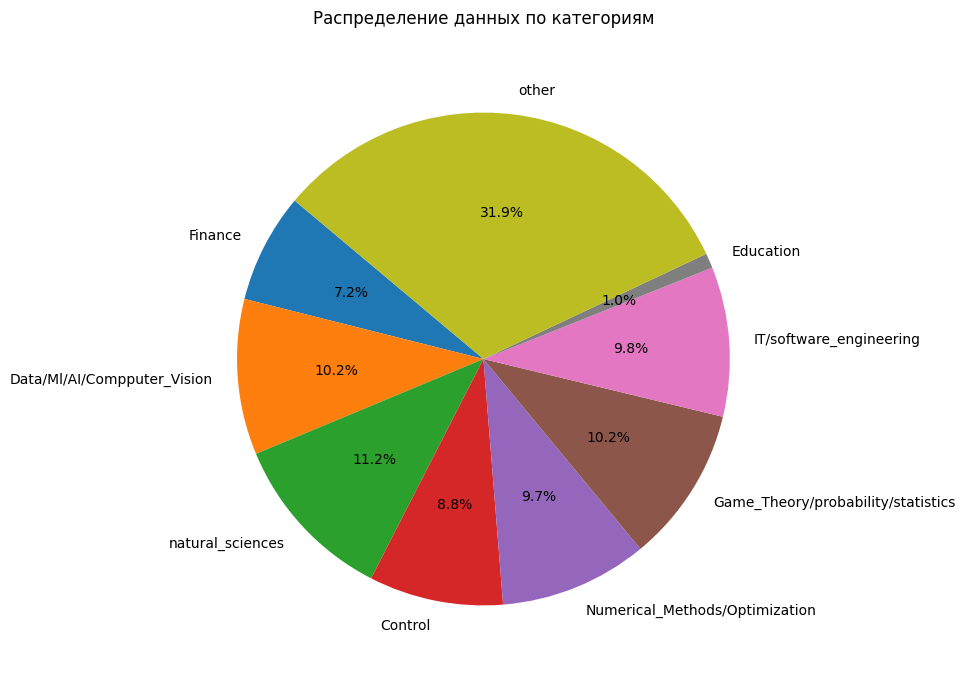

In [89]:
import matplotlib.pyplot as plt

categories = list(groups.keys())
values = list(groups.values())

# Создаем круговую диаграмму
plt.figure(figsize=(10, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)

# Добавляем заголовок
plt.title('Распределение данных по категориям', pad=20)

# Показываем диаграмму
plt.show()

In [90]:
years = set()
with open("tmp~1.csv", mode="r", encoding='utf-8') as csv_input:
    cnt=0
    for row in csv_input.readlines():
        year = row[:-1].split(',')[-2]
        years.add(year)
years = sorted(list(years))
data = dict((i,dict((j,0) for j in groups.keys())) for i in years)
with open("tmp~1.csv", mode="r", encoding='utf-8') as csv_input:
    cnt=0
    for row in csv_input.readlines():
        s = row[:-1].split(',')
        year = s[-2]
        group = s[-1]
        data[year][group] +=1

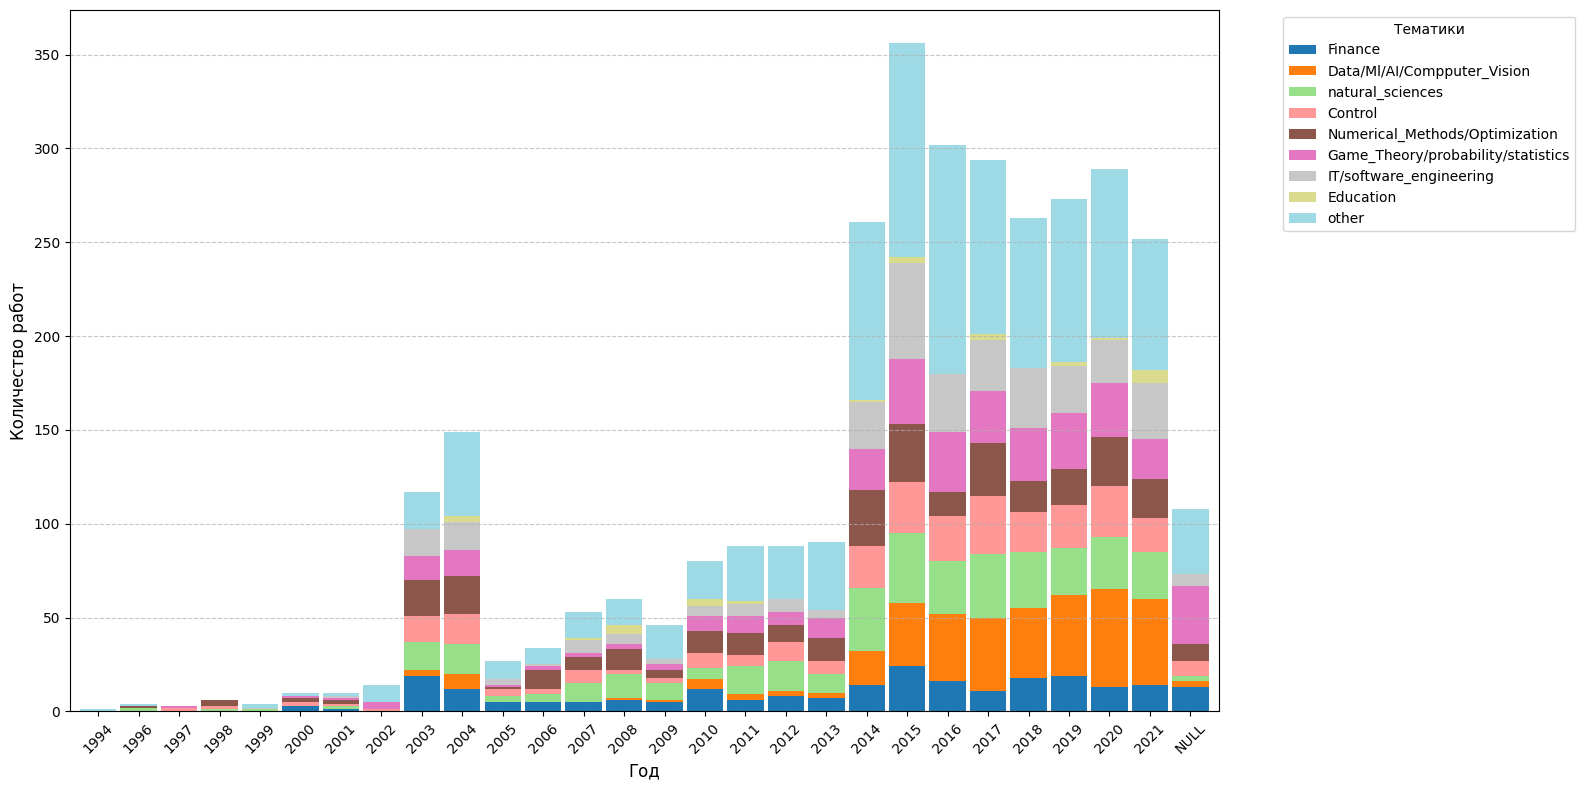

In [91]:
import pandas as pd

df = pd.DataFrame.from_dict(data, orient='index')
df = df.sort_index()

ax = df.plot(kind='bar', stacked=True, figsize=(16, 8), width=0.9,
             colormap='tab20')

plt.ylabel("Количество работ", fontsize=12)
plt.xlabel("Год", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Тематики", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()